In [108]:
# import lib
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons,make_classification,make_regression

In [133]:
# See the data 
# X, y = make_moons(n_samples=300, noise=0.0)
X,y = make_regression(n_samples=300, n_features=1,noise=0.0)

print(X.shape)
print(y[:,None].shape)
temp = np.append((X,y[:,None]),1)
print(temp.shape)
print(X.shape)
X = X - X.mean(0)
plt.figure(figsize=(8,6))
# plt.scatter(X[y==0, 0], X[y==0, 1], color='red', alpha=0.5)
# plt.scatter(X[y==1, 0], X[y==1, 1], color='blue', alpha=0.5)

plt.scatter(X[:, 0], X[:,1], color='red', alpha=0.5)
plt.show()

(300, 1)
(300, 1)
(601,)
(300, 1)


IndexError: index 1 is out of bounds for axis 1 with size 1

<Figure size 576x432 with 0 Axes>

[[-0.94876358 -0.31598683]
 [ 0.31598683 -0.94876358]]


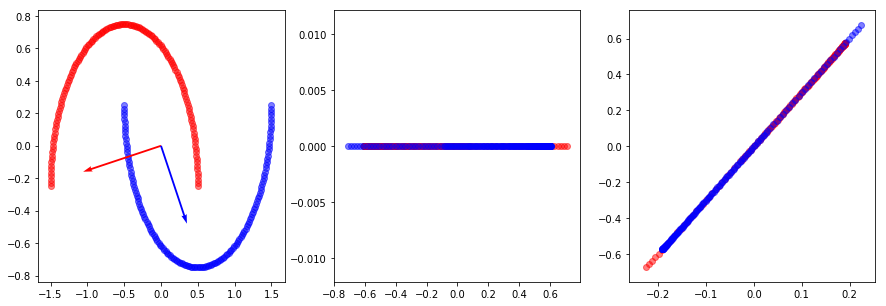

In [105]:
# traditional PCA

# 1. projection
cov = X.T @ X / X.shape[0]
evalue,evector = np.linalg.eigh(cov)
idx = np.argsort(evalue)[::-1]
evecs = evector[:,idx]
print(evecs)
projected = X @ evecs[:,1]
recovered = projected[:,None] @ evecs[:,1][:,None].T

# 2. recover
plt.figure(figsize=(15,5))
plt.subplot(1, 3, 1)
plt.scatter(X[y==0, 0], X[y==0, 1], color='red', alpha=0.5)
plt.scatter(X[y==1, 0], X[y==1, 1], color='blue', alpha=0.5)
origin = [0], [0]
plt.quiver(*origin, evecs[:,0], evecs[:,1], color=['r','b'], scale=3)

plt.subplot(1, 3, 2)
plt.scatter(projected[y==0], np.zeros((len(projected)//2,1)), color='red', alpha=0.5)
plt.scatter(projected[y==1], np.zeros((len(projected)//2,1)), color='blue', alpha=0.5)

plt.subplot(1, 3, 3)
plt.scatter(recovered[y==0, 0], recovered[y==0, 1], color='red', alpha=0.5)
plt.scatter(recovered[y==1, 0], recovered[y==1, 1], color='blue', alpha=0.5)
plt.show()

In [17]:
# simple method
w = np.random.randn(2,1)
print(np.sqrt(np.sum(w**2)))
w = w/(np.sqrt(np.sum(w**2)))
print(np.sqrt(np.sum(w**2)))
print(w.shape)


1.1259752307649025
1.0
(2, 1)


# Reference 
1. results, P., & Rieble, N. (2016). PCA in numpy and sklearn produces different results. Cross Validated. Retrieved 9 April 2019, from https://stats.stackexchange.com/questions/235882/pca-in-numpy-and-sklearn-produces-different-results
2. Python, H., & Eunice, J. (2017). How to make two plots side-by-side using Python. Stack Overflow. Retrieved 9 April 2019, from https://stackoverflow.com/questions/42818361/how-to-make-two-plots-side-by-side-using-python
3. 